## Evaluation of the Results 

This jupyter notebook contains the code to evaluate the simulation results obatined. 
1. Data for each Block is gathered 
2. Data for each Block is compared, measured, results, CVRMSE, e.g. 
3. Data is plotted for 

In [32]:
import geopandas as gpd 
import matplotlib.pyplot as plt

<Axes: >

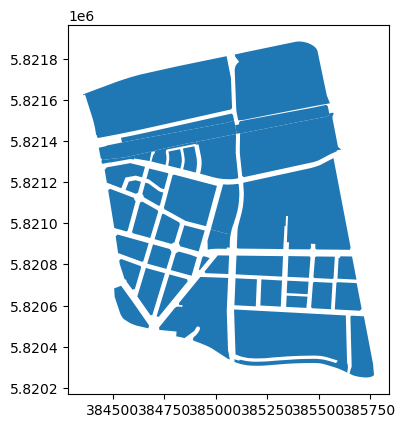

In [9]:
# Load Block level data 
block_data = gpd.read_file(r'auxillary\00_block_shape.shp')
block_data.plot()

<Axes: >

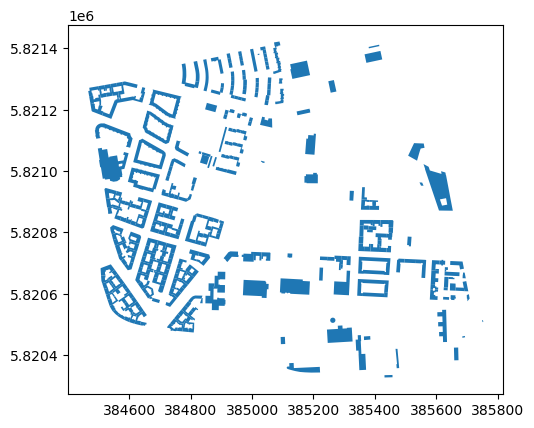

In [15]:
# Load Building level data and shape file
CEA_shape_path = os.path.join('CEA_model', 'DefaultModel', '2020_GER_Updated', 'inputs', 'building-geometry' ,'zone.shp')
CEA_shape = gpd.read_file(CEA_shape_path)
CEA_shape.plot()

In [17]:
CEA_shape = CEA_shape.to_crs(block_data.crs)

In [19]:
# Perform spatial join to find which block each building in CEA_shape belongs to
buildings_with_block = gpd.sjoin(CEA_shape, block_data, how="inner", op='intersects')

# Filter by building Name (replace 'YourBuildingName' with the actual building name)
building_block = buildings_with_block[buildings_with_block['Name'] == 'B1000']

# Assuming 'blknr' is a column in block_data indicating the block number
block_number = building_block['blknr'].unique()

print(f"Building is in block number(s): {block_number}")

Building is in block number(s): ['020055']


c:\Users\felix\anaconda3\envs\cea\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [53]:
# Gather CEA simulation results
import pandas as pd 
import os 

data_dict = {
    "QH_sys_MWhyr": {},
    "E_sys_MWhyr": {}
}
#C:\Users\felix\Documents\Programmieren\Mierendorff_CEA\CEA_model\DefaultModel\2020_GER_Updated\outputs\data\demand\B1000.csv
#CEA_model\\Default_Model2020_GER_Updated\\outputs\\data\\demand\\Total_demand.csv

QH_dict = {}
base_path = 'CEA_model/Block0202023'
block_numbers = list(block_data["blknr"])
# Gather CEA simulation results
import pandas as pd 
import os 

data_dict = {
    
}

block_numbers = list(block_data["blknr"])
# Initialize data_dict with keys for each year and energy type
data_dict = {
    'blknr': [],
    'QH_sys_MWhyr_2020': [],
    'QH_sys_MWhyr_2021': [],
    'QH_sys_MWhyr_2022': [],
    'E_sys_MWhyr_2020': [],
    'E_sys_MWhyr_2021': [],
    'E_sys_MWhyr_2022': []
}

block_numbers = list(block_data["blknr"])
for block_number in block_numbers:
    buildings_in_block = buildings_with_block[buildings_with_block['blknr'] == block_number]
    if buildings_in_block.empty:
            continue
    else:
         data_dict['blknr'].append(block_number)
         for year in [2020, 2021, 2022]:
            path = os.path.join('CEA_model', 'DefaultModel', f'{year}_GER_Updated', 'outputs', 'data', 'demand', 'Total_demand.csv')
            df = pd.read_csv(path)
            # Extract building names into a list
            building_names = buildings_in_block['Name'].tolist()  # Assuming 'Name' is the column with building names
            filtered_df = df[df['Name'].isin(building_names)]
            
            # Append the block number and aggregated values to their respective lists in data_dict
            
            data_dict[f"QH_sys_MWhyr_{year}"].append(filtered_df["QH_sys_MWhyr"].sum())
            data_dict[f"E_sys_MWhyr_{year}"].append(filtered_df["E_sys_MWhyr"].sum())


In [57]:
# Assuming data_dict is already defined as per your previous instructions
simulation_data = pd.DataFrame(data_dict, columns=data_dict.keys())
simulation_merged_gdf = gpd.GeoDataFrame(pd.merge(block_data, simulation_data, on='blknr', how='left'))

In [73]:
# Load measured data 
measured_data_path = os.path.join('auxillary', 'DistrictLevelData.csv')
measured_data = pd.read_csv(measured_data_path)
measured_data['blknr'] = measured_data['blknr'].astype(str)
measured_merged_gdf = gpd.GeoDataFrame(pd.merge(block_data, measured_data, on='blknr', how='left'))
measured_merged_gdf.columns

Index(['blknr', 'bez_x', 'bezname_x', 'plr_x', 'blktypname_x', 'ewk_x',
       'area_x', 'datum_x', 'geometry', 'bez_y', 'bezname_y', 'plr_y',
       'blktypname_y', 'ewk_y', 'area_y', 'datum_y', 'ueberw_dek',
       'freistehen', 'doppelhaus', 'gereihtes', 'anderertyp', 'x_bis_1900',
       'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940', 'x1941_1950',
       'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990', 'x1991_2000',
       'x2001_2010', 'x2011_2015', 'ew2015', 'typ', 'typklar',
       'dh_consumption_mwh2022', 'dh_consumption_mwh_2021',
       'dh_consumption_mwh_2020', 'blknr_2', 'bez_2', 'bezname_2', 'plr_2',
       'blktypna_1', 'ewk_2', 'area_2', 'datum_2', 'fid_x',
       'el_consumption_mwh_2022', 'el_excluded_2022',
       'el_consumption_mwh_2020', 'el_excluded_2020',
       'el_consumption_mwh_2021', 'el_excluded_2021', 'fid_y',
       'gas_consumption_mwh_2022', 'gas_excluded_2022',
       'gas_consumption_mwh_2021', 'gas_excluded_2021',
       'gas_consum

In [71]:
from matplotlib.colors import Normalize


# Assuming block_data and simulation_data are defined GeoDataFrames/DataFrames
simulation_merged_gdf = gpd.GeoDataFrame(pd.merge(block_data, simulation_data, on='blknr', how='left'))

# Assuming simulation_merged_gdf and measured_merged_gdf are defined GeoDataFrames
# Calculate vmin and vmax for normalization across all plots
vmin = min(simulation_merged_gdf[["QH_sys_MWhyr_2020", "QH_sys_MWhyr_2021", "QH_sys_MWhyr_2022"]].min().min(),
           measured_merged_gdf['gas_consumption_mwh_2022'].min())
vmax = max(simulation_merged_gdf[["QH_sys_MWhyr_2020", "QH_sys_MWhyr_2021", "QH_sys_MWhyr_2022"]].max().max(),
           measured_merged_gdf['gas_consumption_mwh_2022', 'gas_consumption_mwh_2021', 'gas_consumption_mwh_2020'].max())

# Define a normalization for the color mapping
norm = Normalize(vmin=vmin, vmax=vmax)

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Create the color map
cmap = plt.cm.viridis

# Plotting QH_shs_MWHyr 2020
simulation_merged_gdf.plot(column='QH_sys_MWhyr_2020', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('QH_shs_MWhyr 2020')

# Plotting QH_shs_MWHyr 2021
simulation_merged_gdf.plot(column='QH_sys_MWhyr_2021', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('QH_sys_MWhyr 2021')

# Plotting QH_shs_MWHyr 2022
simulation_merged_gdf.plot(column='QH_sys_MWhyr_2022', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('QH_sys_MWhr 2022')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)

# Add a common title
fig.suptitle('Simulation of QH in MWh per year per Block on the Mierendorffisland 2020 - 2022 for default model', fontsize=16)

# Adjust the layout
plt.tight_layout()

KeyError: "None of [Index(['QH_shs_MWHyr2020', 'QH_shs_MWHyr2021', 'QH_shs_MWHyr2022'], dtype='object')] are in the [columns]"